<a href="https://colab.research.google.com/github/robingenz/htwg-machine-learning-exercises/blob/main/exercises/02_Linear_Regression/01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression on Fish Data

## Setup

### Einbinden von Paketen

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import math
%matplotlib inline

np.__version__, pd.__version__, sklearn.__version__

('1.23.4', '1.5.0', '1.1.3')

In [3]:
%load_ext version_information
%version_information

Software versions
Python 3.10.8 64bit [GCC 10.2.1 20210110]
IPython 8.5.0
OS Linux 5.10.16.3 microsoft standard WSL2 x86_64 with glibc2.31
Fri Nov 18 21:02:33 2022 UTC

### Einlesen der Daten

In [4]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('data/fishing.npz'):
    print("Downloading...")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz', filename = 'data/fishing.npz')
data = np.load('data/fishing.npz')
dateDownloaded = !date #Calling Linux
dateDownloaded

['Fri Nov 18 21:02:33 UTC 2022']

In [5]:
# Training Set X
x_training_df = pd.DataFrame(data['Xt'], columns=["Livebait", "Camper", "Person", "Child"])
x_training_df.insert(0, 'Intercept', np.ones(200))
x_training_df.describe()

,Intercept,Livebait,Camper,Person,Child
count,200.0,200.000000,200.000000,200.000000,200.000000
mean,1.0,0.855000,0.600000,2.540000,0.705000
std,0.0,0.352984,0.491127,1.133501,0.889907
min,1.0,0.000000,0.000000,1.000000,0.000000
25%,1.0,1.000000,0.000000,2.000000,0.000000
50%,1.0,1.000000,1.000000,3.000000,0.000000
75%,1.0,1.000000,1.000000,4.000000,1.000000
max,1.0,1.000000,1.000000,4.000000,3.000000


In [6]:
# Test Set X
x_test_df = pd.DataFrame(data['Xte'], columns=["Livebait", "Camper", "Person", "Child"])
x_test_df.insert(0, 'Intercept', np.ones(50)) # w*x + b --> b ist das intercept --> 1 damit man ihn gleich behandelt wie die anderen features
x_test_df.describe()

,Intercept,Livebait,Camper,Person,Child
count,50.0,50.000000,50.000000,50.000000,50.000000
mean,1.0,0.900000,0.540000,2.480000,0.600000
std,0.0,0.303046,0.503457,1.034901,0.670059
min,1.0,0.000000,0.000000,1.000000,0.000000
25%,1.0,1.000000,0.000000,2.000000,0.000000
50%,1.0,1.000000,1.000000,2.000000,0.500000
75%,1.0,1.000000,1.000000,3.000000,1.000000
max,1.0,1.000000,1.000000,4.000000,2.000000


In [7]:
# Training Set Y
y_training_df = pd.DataFrame(data['yt'], columns=["Count"])
y_training_df.describe()

,Count
count,200.000000
mean,3.355000
std,11.984872
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,149.000000


In [8]:
# Test Set Y
y_test_df = pd.DataFrame(data['yte'], columns=["Count"])
y_test_df.describe()

,Count
count,50.000000
mean,3.060000
std,10.222843
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,65.000000


In [9]:
x_training_np = x_training_df.to_numpy()
y_training_np = y_training_df.to_numpy()
x_test_np = x_test_df.to_numpy()
y_test_np = y_test_df.to_numpy()

## Aufgaben

### Aufgabe a)

In [10]:
# See: https://github.com/ioskn/mldl_htwg/blob/master/linear_methods/LinearRegression.ipynb
XTX = np.matmul(x_training_np.T,x_training_np)
XTXI = np.linalg.inv(XTX)
XTXIXT = np.matmul(XTXI, x_training_np.T)
linear_reg_weights = np.matmul(XTXIXT, y_training_np)
linear_reg_weights

array([[-8.49222821],
       [ 2.4822138 ],
       [ 2.95430727],
       [ 4.64953914],
       [-5.47160051]])

In [11]:
diffObservedYAndPredictedYTraining = np.matmul(x_training_np, linear_reg_weights).flatten() - y_training_np.flatten()
mse_training = np.mean(np.square(diffObservedYAndPredictedYTraining))
mse_training

117.26947782687198

### Aufgabe b)

In [12]:
# See: https://github.com/ioskn/mldl_htwg/blob/master/linear_methods/LinearRegression.ipynb
from sklearn.linear_model import LinearRegression
model_skl = LinearRegression(fit_intercept=False) #We have an extended X
model_skl.fit(x_training_np, y_training_np)
model_skl.coef_

array([[-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051]])

### Aufgabe c)

Bestimmen des **Root Mean Square Errors (RMSE)** für das Testset:

In [13]:
diffObservedYAndPredictedYTest = np.matmul(x_test_np, linear_reg_weights).flatten() - y_test_np.flatten()
mse_test = np.mean(np.square(diffObservedYAndPredictedYTest))
rmse_test = np.sqrt(mse_test)
rmse_test

8.588126386734231

Bestimmen der **durchschnittlichen negativen Log-Likelihood (NLL)** für das Testset:

In [14]:
import scipy.stats as stats

mean = (diffObservedYAndPredictedYTest).mean() # Erwartungswert
scale = np.std(diffObservedYAndPredictedYTest) # Standardabweichung
gaussian = stats.norm(loc=mean, scale=scale).pdf(diffObservedYAndPredictedYTest)
nll = -np.log(gaussian)
nll.mean()

3.5674472292366746

### Aufgabe d)

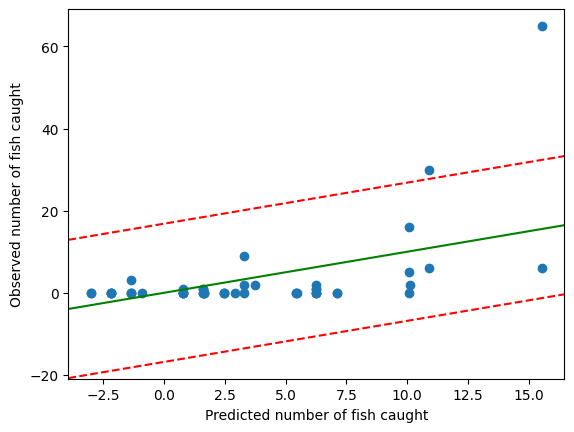

In [15]:
from scipy.stats import linregress

y_pred = np.matmul(x_test_np, linear_reg_weights).flatten()
plt.scatter(y_pred, y_test_np.flatten())

reg = linregress(y_pred, y_pred)
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, color="green")

reg = linregress(y_pred, y_pred+1.96*rmse_test)
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="red")

reg = linregress(y_pred, y_pred-1.96*rmse_test)
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="red")

plt.xlabel('Predicted number of fish caught')
plt.ylabel('Observed number of fish caught')
# plt.xlim(-5, 12.5)
# plt.ylim(-2, 40)
plt.show()

### Aufgabe e)

In [16]:
# See: https://github.com/ioskn/mldl_htwg/blob/master/uebungen/Fish_Poisson_Keras.ipynb
def negative_log_likelihood(y_np, x_np, weights):
    mu = np.exp(np.matmul(x_np, weights))
    ret = np.zeros_like(mu)
    for i in range(ret.shape[0]):
        ret[i] = mu[i] - y_np[i]*np.log(mu[i]) + np.log(1.0*np.math.factorial(int(y_np[i])))
    return np.mean(ret)
    
def gradient_descent_nll(y_np, x_np, weights):
    mu = np.exp(np.matmul(x_np, weights))
    theta = np.zeros_like(x_np)
    for i in range(x_np.shape[0]):
        mux = x_np[i] * mu[i]
        theta[i] = -mux + y_np[i] * x_np[i]
    return np.mean(theta, axis=0)

Testen der Funktion zur Berechnung des **durchschnittlichen negativen Log-Likelihood (NLL)** für das Trainingsset mit den Gewichten `(1,1,1,1,1)`:

In [17]:
weights = np.ones(5)

nll = negative_log_likelihood(y_training_np, x_training_np, weights)
nll

1507.985652179718

Testen der Funktion zur Berechnung der **Gradienten** für das Trainingsset mit den Gewichten `(1,1,1,1,1)`:

In [18]:
weights = np.ones(5)

np.abs(np.round(gradient_descent_nll(y_training_np, x_training_np, weights), 2))

array([1518.61, 1403.99, 1171.02, 5701.91, 3258.7 ])

In [19]:
hist = []
epochs = 5000
learning_rate = 0.001

weights = np.ones(5)

for i in range(epochs):
    mean = negative_log_likelihood(y_training_np, x_training_np, weights)
    hist.append(mean)
    weights = weights + learning_rate * gradient_descent_nll(y_training_np, x_training_np, weights)

weights

array([-1.08852056,  0.2597268 ,  0.54509109,  0.85448041, -1.65101241])

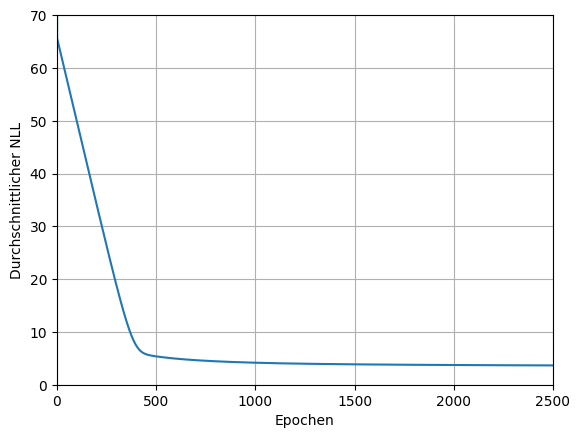

In [20]:
plt.plot(hist)
plt.grid()
plt.ylim(0, 70)
plt.xlim(0, 2500)
plt.xlabel('Epochen')
plt.ylabel('Durchschnittlicher NLL')
plt.show()

### Aufgabe f)

In [21]:
from scipy.stats import linregress

y_pred = np.exp(np.matmul(x_test_np, weights))
sort_idx = np.argsort(y_pred)
y_pred_sorted = y_pred[sort_idx]
perc_025 = stats.poisson(y_pred_sorted).ppf(.025)
perc_975 = stats.poisson(y_pred_sorted).ppf(.975)
print("2,5%-Quantile:", perc_025)
print("97,5%-Quantile:", perc_975)

2,5%-Quantile: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  4.  4.  5. 14. 14.]
97,5%-Quantile: [ 1.  1.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  4.  4.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9. 16. 16. 17. 33. 33.]


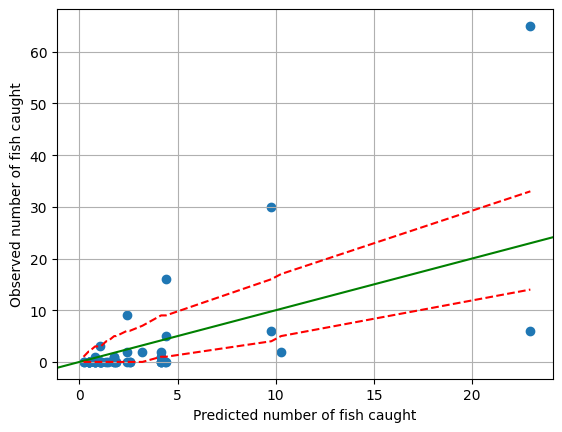

In [22]:
plt.scatter(y_pred, y_test_np.flatten())

reg = linregress(y_pred_sorted, y_pred_sorted)
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, color="green")

plt.plot(y_pred_sorted, perc_025, linestyle='dashed', c="red")
plt.plot(y_pred_sorted, perc_975, linestyle='dashed', c="red")

plt.grid()
# plt.xlim(0, 15)
# plt.ylim(-1, 35)

plt.xlabel('Predicted number of fish caught')
plt.ylabel('Observed number of fish caught')
plt.show()